# Matplotlib workshop
*8th December 2021* <br>
**Tom Peterken**


## Overview
This workshop will cover some basics of matplotlib.  By the end you should be comfortable with using matplotlib for your basic data visualisation needs, and should be confident that you can begin to explore the vast range of things you can create with matplotlib.

<div class="alert alert-block alert-info">
<b>Assumptions:</b> You are assumed to be already proficient in Python, and to be aware of the basics of using pandas and geopandas
</div>


### Contents

The workshop will be structured as follows:
1. **Getting started with Figures and Axes**:  The wrong way and the right way to start using matplotlib.
1. **Basic plotting and image display**:  Let's make some graphs.
1. **Common dataviz tasks and some plot types**:  Let's make better graphs.
1. **Aesthetic control**:  Changing colours, fonts, labels, legends, colourbars, axes, and things you didn't even think of.
1. **Geopandas and contextily**:  When does cartesian become cartography?


## Setup

You'll need matplotlib, geopandas, pandas, numpy, and contextily installed.

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import contextily as ctx

Note that we're using the pyplot module of matplotlib, which contains most of the main commonly-used functions.  I rarely use the other modules, and only ever for more advanced control beyond what we'll cover today.

## Part 1: Getting started with Figures and Axes
In this section we'll understand the building blocks of creating visualisations in matplotlib. 

### 1.1: The right way and the wrong way
If you have used some basic matplotlib commands before, you might have noticed that there's sometimes two ways to do things.  For example, the following both create the same simple graph:

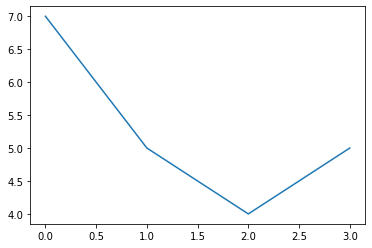

In [2]:
plt.plot([0,1,2,3], [7,5,4,5])

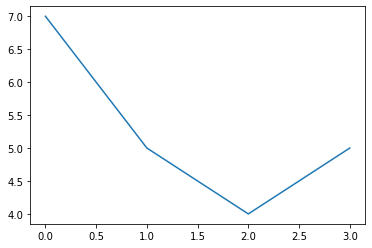

In [3]:
f, ax = plt.subplots()
ax.plot([0,1,2,3], [7,5,4,5])

<div class="alert alert-block alert-warning">
You might think that given the first option is quicker, that's the best way to start using matplotlib, but you'd be wrong. 
</div>

By using the "shortcut" functions like the top example, you'll quickly hit limits with what you can do with matplotlib, so we're going to do things the proper way.  This might mean some of the things we do today are a little different to what you're used to.

So what's going on in the second example?

### 1.2: Figures and Axes

Plotting with matplotlib is generally based on two building blocks.

A [Figure](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure) is the main frame you are going to draw into.  Think of it as your "image".  You can generate a Figure using the [Figure()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) function:

In [125]:
f = plt.Figure()

We haven't drawn anything into the Figure, so it's not displaying anything.

To draw things in our Figure, we need an [Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes).    The Axes is you "plot" within the "image". We can add an Axes to our current Figure with the [axes()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axes.html) function:

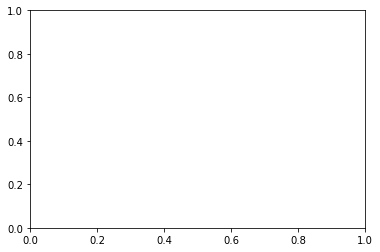

In [5]:
ax = plt.axes()

However, manually adding individual Axes to each Figure gets complicated, especially when you might be generating many Figures each with many Axes.  My preferred way to create Figures and Axes is with the [subplots()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function:

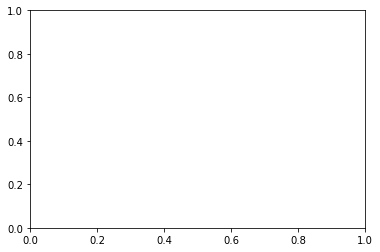

In [6]:
f, ax = plt.subplots()

The subplots() function is incredibly powerful in terms of specifying how your plot is arranged in your Figure.  We don't have time to explore it fully today, but one useful feature is that it makes adding multiple plots to your Figure very easy.

### 1.3: Multiple Axes in one Figure
You can add as many Axes to a Figure as you need in a grid layout.  For example, we might want two side-by-side plots:

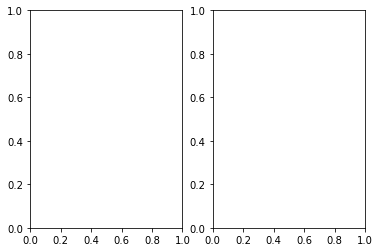

In [7]:
f, axs = plt.subplots(nrows=1, ncols=2)

The returned `axs` is now an *array* of Axes instances.  Axes objects are listed left-to-right or top to bottom:

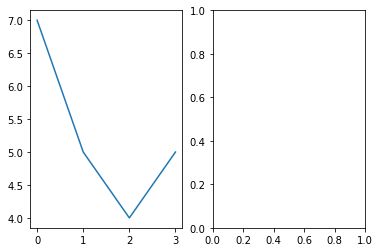

In [8]:
f, axs = plt.subplots(nrows=1, ncols=2)

axs[0].plot([0,1,2,3], [7,5,4,5])

Note that by default, the two (or however many) sub-plots behave completely independently.

## Part 2: Basic plotting
We've already encountered the Axes.plot() function, but now we'll explore how it works, and also look at some of the many other basic plot functions that we might want to use.  We'll also start to understand some of the basic ways we might need to modify the appearance of our plots.

To play with the plotting functions, I've made a fictional list of some OS employees' Glint results.  I'm just using pandas to read it in and displaying it to see what's there.

In [9]:
glint_results = pd.read_csv('./fictional-glint-results.csv')
glint_results

,name,initials,fave_colour,years_service,happiness,energy
0,Tom P,TP,red,1.2,5,4
1,Steve A,SA,blue,0.5,5,5
2,Steve B,SB,lightblue,10.6,2,2
3,Steve C,SC,darkgreen,15.3,4,1
4,Steve D,SD,brown,20.0,3,1
5,Stephen X,SX,purple,5.0,3,4
6,Stephanie M,SM,orange,4.0,4,5
7,Jonathan S,JS,red,35.0,1,1
8,Other Jonathan,OJ,violet,7.0,5,3
9,Eleanor S,ES,black,9.0,4,3


### 2.1: Plotting lines and points
The [Axes.plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html) function is the basic function for two-dimensional plotting.  You can use it for line plots or basic scatter plots.  Let's just make a plot of everyone's happiness scores from Glint.  We can do a very simple plot by providing the plot() function with a list-like of numerical values.

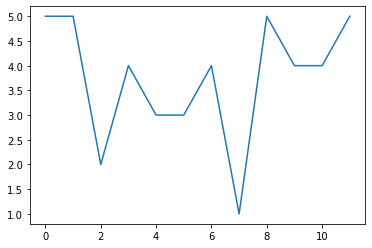

In [10]:
f, ax = plt.subplots()
ax.plot(glint_results['happiness'])

Clearly that plot isn't scoring any points for informativeness.

To use the plot() function properly we ought to give it some x-values.  These would normally be numerical, but they can be a list of strings too:

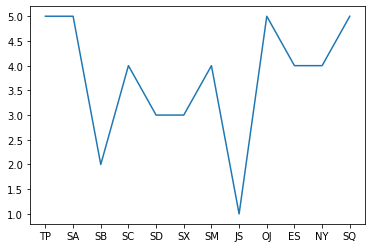

In [11]:
f, ax = plt.subplots()
ax.plot(glint_results['initials'], glint_results['happiness'])

A bit better, but not great.  For one thing, a line plot is inappropriate for this example.

The plot() function takes as its third argument a string denoting the format of the line.  There are many different possibilities for this string, and you'll gradually get to know what they all do.  For this graph, we should show the plot as just markers.  Here's a few examples.

- 'bo' indicated blue circle markers:

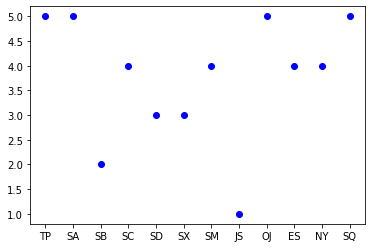

In [134]:
f, ax = plt.subplots()
ax.plot(glint_results['initials'], glint_results['happiness'], 'bo')

- 'rx' indicates red crosses:

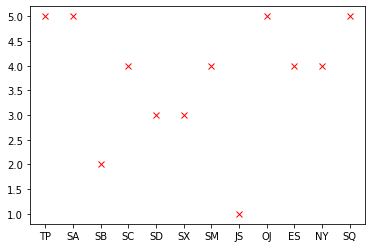

In [13]:
f, ax = plt.subplots()
ax.plot(glint_results['initials'], glint_results['happiness'], 'rx')

You get the idea.

The graph is looking a bit better, but it's still not especially informative.  We will definitely need to add some axes labels and titles.  You can do this with the [set_xlabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html), [set_ylabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html), and [set_title()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html) functions, which are pretty straightforward.

Text(0.5, 0, 'Employee initials')

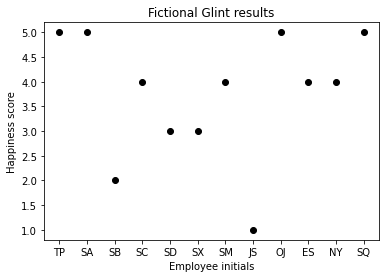

In [14]:
f, ax = plt.subplots()
ax.plot(glint_results['initials'], glint_results['happiness'], 'ko') # Note: 'k' indicates blacK.

ax.set_title('Fictional Glint results')
ax.set_ylabel('Happiness score')
ax.set_xlabel('Employee initials')

Nice!  Finally a plot which won't get laughed at on a powerpoint slide.

What about if we wanted to show the happiness and the energy scores together?  There's a few different options for adding multiple datasets to the same Axes.  I think this is the cleanest option:

Text(0.5, 0, 'Employee initials')

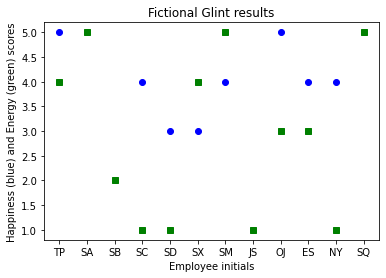

In [15]:
f, ax = plt.subplots()

ax.plot(glint_results['initials'], glint_results['happiness'], 'bo')
ax.plot(glint_results['initials'], glint_results['energy'], 'gs') # Note 's' means square markers

ax.set_title('Fictional Glint results')
ax.set_ylabel('Happiness (blue) and Energy (green) scores')
ax.set_xlabel('Employee initials')

That's obviously not the best way to differentiate between the blue and green symbols.

Finally, let's just do a quick plot of two variables (happiness and energy) against one another.

Text(0.5, 0, 'Happiness')

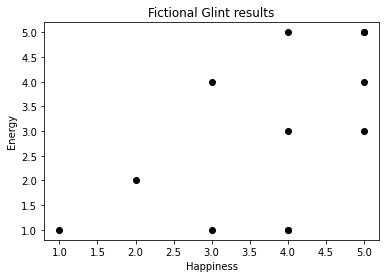

In [136]:
f, ax = plt.subplots()
ax.plot(glint_results['happiness'], glint_results['energy'], 'ko')
ax.set_title('Fictional Glint results')
ax.set_ylabel('Energy')
ax.set_xlabel('Happiness')

### 2.2: Legends
There are several ways to add a legend.  For nearly all cases, the best way is to add a `label` kwarg to the plot() command, and then use the [Axes.legend()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html) method:

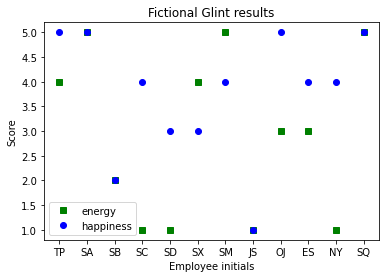

In [137]:
f, ax = plt.subplots()
ax.plot(glint_results['initials'], glint_results['energy'], 'gs', label='energy')
ax.plot(glint_results['initials'], glint_results['happiness'], 'bo', label='happiness')
ax.set_title('Fictional Glint results')
ax.set_ylabel('Score')
ax.set_xlabel('Employee initials')

ax.legend()

Legend placement in matplotlib will try to be clever, but you can specify where in the Axes you'd like it to appear.  There are presets, and you do have finer control if you want it, but proper placement is a fine art...  Ask me if you need help with a specific example, because there are tricks which I won't go into here!  The above placement is probably right for this plot at least.

It is sometimes necessary to add a legend for objects which don't actually appear in the plot.  This is possible, but fiddly.  You'll need to read about handles and labels.

### 2.3: Finer scatter control
Sometimes the basic plot() command won't suffice.  For example, what if we wanted to make everyone happier by plotting in their favourite colour?  We could do this by adding one plot() command for every employee, or otherwise we can use the [Axes.scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html) function, which is more powerful for finer control on plotting scatter plots, but is a bit slower, especially with many data points, so I tend not to use it if I can get away with using plot() instead.

Using scatter() is similar to using plot(), but we can provide a list of colours corresponding to each point.

Text(0.5, 0, 'Employee')

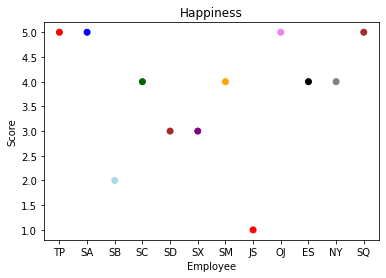

In [138]:
f, ax = plt.subplots()
ax.scatter(glint_results['initials'], glint_results['happiness'], color=glint_results['fave_colour'])
ax.set_title('Happiness')
ax.set_ylabel('Score')
ax.set_xlabel('Employee')

You'll notice that matplotlib is happy to accept colours in written or single-letter code form.  In fact, it has an enormous array of built-in colours, or it will also accept (r,g,b) or (r,g,b,alpha) tuples, and many many more options beyond.  We'll have another look at these later.

The scatter() function also allows more control over the marker size.  For example, let's size the points by their corresponding energy scores, just because.

Text(0.5, 0, 'Employee')

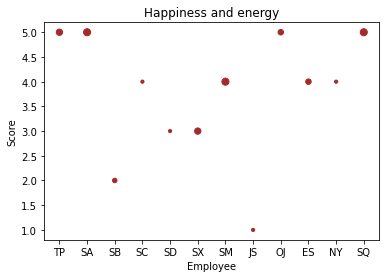

In [139]:
f, ax = plt.subplots()
ax.scatter(
    glint_results['initials'],
    glint_results['happiness'],
    c='brown',
    s=10*glint_results['energy'] # Note: marker sizes are specified in pixels.  I've multiplied by 10.
)
ax.set_title('Happiness and energy')
ax.set_ylabel('Score')
ax.set_xlabel('Employee')

What a happy plot.

### 2.4: Image display

At some point you'll probably need to display an image.  By "image" I mean some sort of 2D array of values; it could be an actual aerial image, a model output over 2 parameters, or some other thing.  There are several ways to display an image, and we won't go into too much detail of all the different variations and normalisations.  If you're trying to show a geo raster, it's possible to do so with matplotlib but you might want to check out rasterio, which is essentially a matplotlib wrapper.

I've made a fictional "image" of past glint scores; the frequency of happiness (X-coords) and energy (Y-coords) in the past.  I'm reading it in as a numpy array.

In [20]:
glint_image = np.load('./fictional-image.np', allow_pickle=True)
glint_image

array([[10,  8,  6,  4,  2,  1],
       [ 9, 10,  7,  4,  2,  2],
       [ 5,  7, 14,  4,  3,  2],
       [ 4,  6,  7, 15,  9,  8],
       [ 1,  6,  7, 12, 30, 27],
       [ 1,  5,  7, 12, 15, 25]])

The simplest way to display the image is with the [Axes.imshow()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html) function.

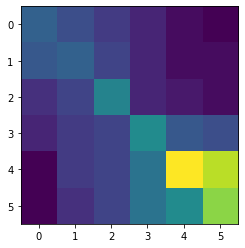

In [21]:
f, ax = plt.subplots()
ax.imshow(glint_image)

A few things to note:
- The y-axis has reversed direction.  That's just because that's how most images are stored.
- By default, pixel values are centred on integer values starting at 0.  By coincidence, that's fine for us, but often you'll need to change that with the extent kwarg.  Beware for pixel widths...
- The raster data values are mapped into colours.  In the above example, yellow indicates higher values and blue lower ones.
- The Axes has shrunk in the X-dimension so that pixels are square.

We can flip the y-axis back to how we had it earlier using the origin='lower' kwarg, to make a happiness--energy plot as we were using before:

Text(0.5, 1.0, 'Historic fictional glint scores')

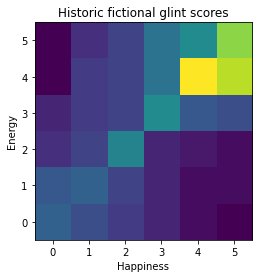

In [22]:
f, ax = plt.subplots()
ax.imshow(glint_image, origin='lower')
ax.set_ylabel('Energy')
ax.set_xlabel('Happiness')
ax.set_title('Historic fictional glint scores')

### 2.5: Colourbars
We need to add a colourbar to indicate the mapping of colours to data values.  Unfortunately, colourbars in matplotlib are not as straightforward to use as legends.  For basic use, they're still fine though.  There isn't a Axes.colorbar() method, so we have to use the [plt.colorbar()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) command and provide the image to draw the colorbar of.

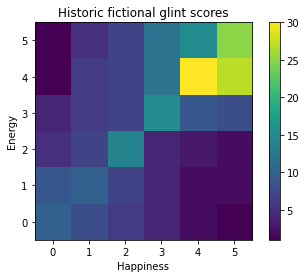

In [23]:
f, ax = plt.subplots()
im = ax.imshow(glint_image, origin='lower')
ax.set_ylabel('Energy')
ax.set_xlabel('Happiness')
ax.set_title('Historic fictional glint scores')

plt.colorbar(im)

The colormap can be changed to any one of a [large number of available colormaps](https://matplotlib.org/stable/gallery/color/colormap_reference.html) with the cmap kwarg in the imshow() command.  It is possible to create your own colormap too.  Also note that you can reverse the direction of any colormap by appending '\_r' to the name!

Let's also add a label to indicate what the colorbar is actually showing.

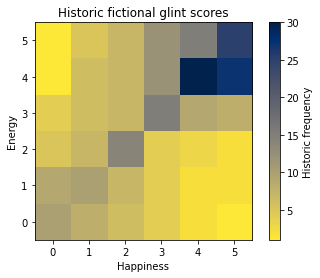

In [142]:
f, ax = plt.subplots()
im = ax.imshow(glint_image, origin='lower', cmap='cividis_r')
ax.set_ylabel('Energy')
ax.set_xlabel('Happiness')
ax.set_title('Historic fictional glint scores')
plt.colorbar(im, label='Historic frequency')

There's a lot of options for altering the appearance of the colorbar, some examples of which are below.
- By default, the colorbar will extend over the whole range of data values.  If you want to set where the end(s) of the colormap are, then use the vmin/vmax kwargs in the imshow command.  In this example I've set the lower bound to be 5, to clip some of the low values.
- I've set the extend kwarg in the colorbar to be 'min' to add an arrow indicating the presence of values below 5.  There's several controls over the appearance of the extend arrows but the default is fine.
- I've also shrunk the size of the colorbar relative to its default (filling the full Axes height).


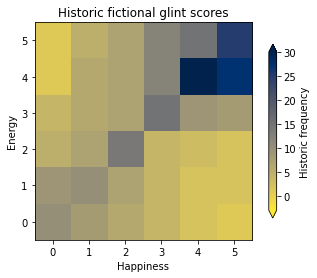

In [145]:
f, ax = plt.subplots()
ax.set_ylabel('Energy')
ax.set_xlabel('Happiness')
ax.set_title('Historic fictional glint scores')

im = ax.imshow(
    glint_image,
    origin='lower',
    cmap='cividis_r',
    vmin=-3
)

plt.colorbar(
    im,
    label='Historic frequency',
    extend='both',
    shrink=0.8
)

The colorbar object is actually another image in a new Axes.  That new Axes can be drawn to steal space from the original Axes (default behaviour) or you can provide the colorbar axes yourself if you want control over exactly where the colorbar will appear, by providing the axes with the cax kwarg.  It requires some careful control over how the cax is sized though, so avoid it if you can!

## Part 3: Common dataviz tasks and plot types
Now we've learnt about the core plotting functions, we can start to look at how we can exercise finer control and use some of the many other plot types to generate something you might want to use.  In this section we'll aim to just highlight a few different types of plots and dive briefly into some basic usage of them because I think it might be useful.

There are [many different plot types](https://matplotlib.org/stable/plot_types/index.html) available in matplotlib, each of which has generally accessible documentation now that we have a good understanding of those building blocks.

### 3.1: Saving your image
Before we get too much further, it's probably about the right time to mention how to save the graphs you're creating.  It's easy, with the [Figure.savefig()](https://matplotlib.org/stable/api/figure_api.html?highlight=savefig#matplotlib.figure.Figure.savefig) method.  Often the default isn't quite brilliant, so this is how I prefer to use it!

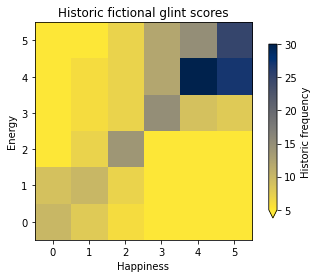

In [147]:
f, ax = plt.subplots()
ax.set_ylabel('Energy')
ax.set_xlabel('Happiness')
ax.set_title('Historic fictional glint scores')

im = ax.imshow(
    glint_image,
    origin='lower',
    cmap='cividis_r',
    vmin=5
)

plt.colorbar(
    im,
    label='Historic frequency',
    extend='min',
    shrink=0.8
)

f.savefig(
    './my-first-figure.png', # Where to save.  You can use most common image file extensions.
    dpi = 200, # Image resolution.  This is high.
    bbox_inches = 'tight' # This one is optional...
    # It just makes sure that you haven't got excessive whitespace around the plot.  Make it your habit to use it.
)

### 3.2: Scatter plot over an image
What if we want to combine the historic and most recent Glint scores?  An Axes can take as many different plots on top of each other as you like.

Up until now, it hasn't mattered what order we apply the methods of the Axes class.  Now, because we want the image to be added first and the plot on top, we have to make sure we do those two commands in that order.

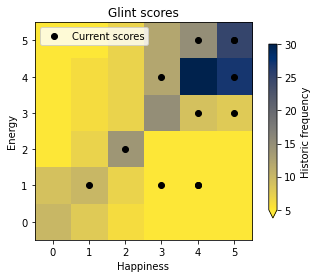

In [27]:
# Create the Figure and Axes as usual...
f, ax = plt.subplots()

# Set the axes and figure labels as before...
ax.set_ylabel('Energy')
ax.set_xlabel('Happiness')
ax.set_title('Glint scores')

# Draw the underlying image
im = ax.imshow(glint_image, origin='lower', cmap='cividis_r', vmin=5)

# Then plot the points
ax.plot(glint_results['happiness'], glint_results['energy'], 'ko', label='Current scores')

# Then add a colorbar and legend
plt.colorbar(
    im,
    label='Historic frequency',
    extend='min',
    shrink=0.8
)
ax.legend()

### 3.3:  Contour plots
Contour plots are nice and easy *as long as your data are in a regular 2D array*.  There's a massive variety of ways to alter the appearance; have a look at the [Axes.contour()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.contour.html) and [Axes.contourf()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.contourf.html) documentation.

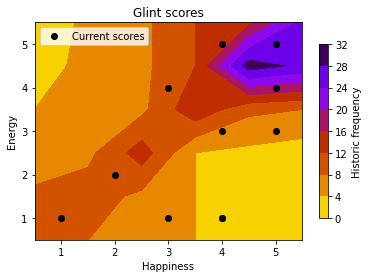

In [151]:
# Create the Figure and Axes as usual...
f, ax = plt.subplots()

# Set the axes and figure labels as before...
ax.set_ylabel('Energy')
ax.set_xlabel('Happiness')
ax.set_title('Glint scores')

# Draw the underlying frequency contours
im = ax.contourf(glint_image, levels=7, origin='lower', cmap='gnuplot_r')

# Then plot the points
ax.plot(glint_results['happiness'], glint_results['energy'], 'ko', label='Current scores')

# Then add a colorbar and legend
plt.colorbar(im, label='Historic frequency', shrink=0.8)
ax.legend()

### 3.4: Histograms

What about plotting the past distribution of scores as histograms?  I love histograms.  They're very versatile, and [Axes.hist()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html) is generally excellent.

First I'll read in the past 1-dimensional scores.  Each of these is a list of score values.

In [29]:
happiness_distribution = np.load('./fictional-happiness.np', allow_pickle=True)
energy_distribution = np.load('./fictional-energy.np', allow_pickle=True)

We can plot a histogram of either of these quite easily...

(array([31.,  0., 34.,  0., 35.,  0., 49.,  0., 83., 65.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

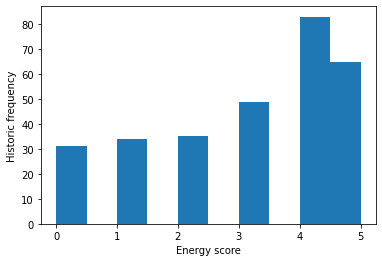

In [30]:
f, ax = plt.subplots()
ax.set_xlabel('Energy score')
ax.set_ylabel('Historic frequency')
ax.hist(energy_distribution)

... but it looks rubbish.  The default binning will put 10 equally-spaced bins with their *upper bounds* over the range of the provided data (see second returned list).  For discrete data like ours, that's nearly always not ideal.

We can increase the number of bins, which will help the appearance a bit...

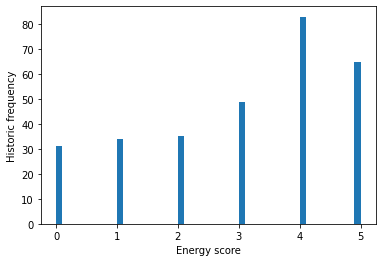

In [31]:
f, ax = plt.subplots()
ax.set_xlabel('Energy score')
ax.set_ylabel('Historic frequency')
_ = ax.hist(energy_distribution, bins=50)

... but that's still not great.  Alternatively, we could set the bin boundaries manually.

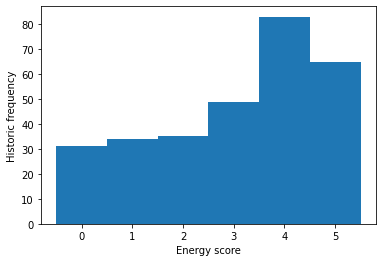

In [32]:
f, ax = plt.subplots()
ax.set_xlabel('Energy score')
ax.set_ylabel('Historic frequency')

score_bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
_ = ax.hist(energy_distribution, bins=score_bins)

Now what if we want to show two distributions together?  There's many ways to do it, but this is my favourite.

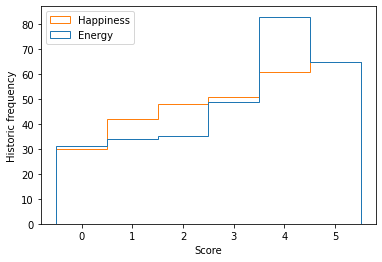

In [154]:
f, ax = plt.subplots()
ax.set_xlabel('Score')
ax.set_ylabel('Historic frequency')

_ = ax.hist(
    [energy_distribution, happiness_distribution], # Look, we're plotting two things in one command!
    bins=score_bins,
    histtype='step', # This removes the colour fill beneath the histograms
    label=['Energy', 'Happiness'] # Labels for the two histograms we're plotting
)

ax.legend(loc='upper left')

## Part 4: Aesthetic control
We're getting to the point where we're ready to start exploring some of the fine aesthetic controls available with matplotlib.  In this section the aim is to highlight just what is possible.  We can't cover everything, but I'll try to give you a flavour of where to start looking.

### 4.1: Axis limits and scaling
It's extremely common to need to specify the axis limits of a plot.  Up until now we've just used matplotlib's default "best guess" for each plot, which is often pretty good.  But what if we want to home in to a particular part of the plot?  It's very easy with the [Axes.set_xlim()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html) and [Axes.set_ylim()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylim.html) functions.

Note that behaviour of these is difficult if you're using non-numeric values on one axis, like employee initials...  Speak to me if you need to do something like that because there's an elegant workaround.

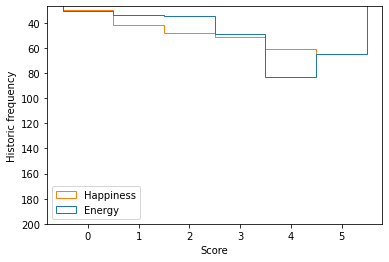

In [160]:
f, ax = plt.subplots()
ax.set_xlabel('Score')
ax.set_ylabel('Historic frequency')
ax.set_ylim(200, 27)

_ = ax.hist(
    [energy_distribution, happiness_distribution],
    bins=score_bins,
    histtype='step',
    label=['Energy', 'Happiness']
)
ax.legend()


Something that you also might want to do is to change the scaling of your axes.  For example, we can change to a log-scaled axis with [Axes.set_yscale()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_yscale.html) and [Axes.set_xscale()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xscale.html).  You can also define your own axis scaling.

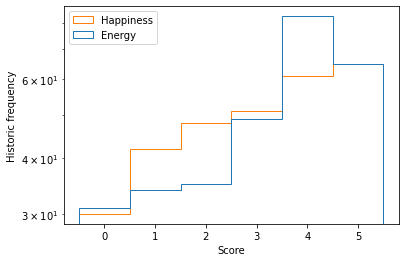

In [35]:
f, ax = plt.subplots()
ax.set_xlabel('Score')
ax.set_ylabel('Historic frequency')
_ = ax.hist(
    [energy_distribution, happiness_distribution],
    bins=score_bins,
    histtype='step',
    label=['Energy', 'Happiness']
)
ax.legend(loc='upper left')

ax.set_yscale('log')

### 4.2: Axis tick control
Note that when we switched to log scaling, the axis tick labels have changed.

It is possible to set the axis tick locations manually with [Axes.set_xticks()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html) and [Axes.set_yticks()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_yticks.html) (although using these with a log scale is actually very fiddly because the underlying formatter changes):

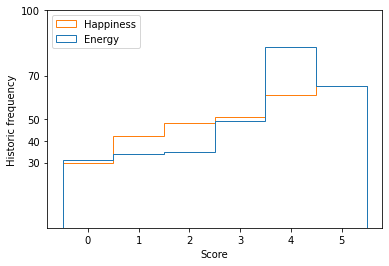

In [36]:
f, ax = plt.subplots()
ax.set_xlabel('Score')
ax.set_ylabel('Historic frequency')
_ = ax.hist(
    [energy_distribution, happiness_distribution],
    bins=score_bins,
    histtype='step',
    label=['Energy', 'Happiness']
)
ax.legend(loc='upper left')

ax.set_yticks([30,40,50,70, 100])

Note that unless we otherwise set the axis limits, the view will alter if it needs to to accommodate all of the ticks you've set.

We can also set the labels of the ticks with [Axes.set_xticklabels()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html) and [Axes.set_yticklabels()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_yticklabels.html) , but note that we need to fix the corresponding ticks even if the default is okay:

[Text(0, 0, 'Terrible'),
 Text(1, 0, 'Bad'),
 Text(2, 0, 'Meh'),
 Text(3, 0, 'Okay'),
 Text(4, 0, 'Good'),
 Text(5, 0, 'Excellent\n hi')]

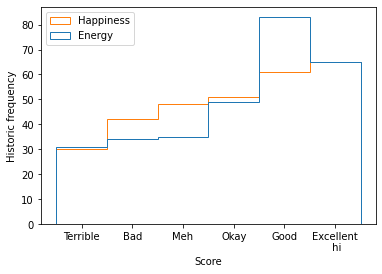

In [165]:
f, ax = plt.subplots()
ax.set_xlabel('Score')
ax.set_ylabel('Historic frequency')
ax.hist(
    [energy_distribution, happiness_distribution],
    bins=score_bins,
    histtype='step',
    label=['Energy', 'Happiness']
)
ax.legend(loc='upper left')

ax.set_xticks(range(6))
ax.set_xticklabels(labels=['Terrible', 'Bad', 'Meh', 'Okay', 'Good', 'Excellent\n hi'])

Another thing we ought to discuss is the difference between major and minor ticks.  Often, minor ticks don't appear by default, but they're the ones which are smaller and don't (usually) have labels.

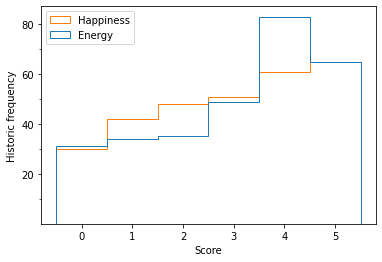

In [38]:
f, ax = plt.subplots()
ax.set_xlabel('Score')
ax.set_ylabel('Historic frequency')
ax.hist(
    [energy_distribution, happiness_distribution],
    bins=score_bins,
    histtype='step',
    label=['Energy', 'Happiness']
)
ax.legend(loc='upper left')

ax.set_yticks([20,40,60,80], minor=False)
ax.set_yticks([10,30,50,70], minor=True)

### 4.3: Line colours and widths
We already looked at setting colours.  Matplotlib has a large list of [in-built colours](https://matplotlib.org/devdocs/gallery/color/named_colors.html), and if that list isn't good enough it also has access to the [XKCD colour names](https://xkcd.com/color/rgb/#:~:text=The%20954%20most%20common%20RGB%20monitor%20colors%2C%20as,%28%23e50000%29%20light%20blue%20%28%2395d0fc%29%20teal%20%28%23029386%29%20orange%20%28%23f97306%29), which can often be useful, or you can specify an (r,g,b) or (r,g,b,a) tuple where a is a transparency from 0 to 1.

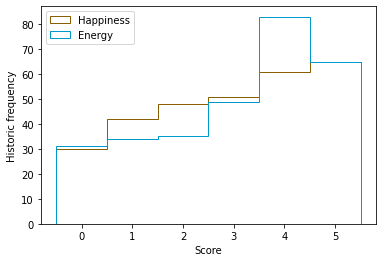

In [39]:
f, ax = plt.subplots()
ax.set_xlabel('Score')
ax.set_ylabel('Historic frequency')
ax.hist(
    [energy_distribution, happiness_distribution],
    bins=score_bins,
    histtype='step',
    label=['Energy', 'Happiness'],
    
    color=[(0,0.6,0.8), 'xkcd:poo brown']
)
ax.legend(loc='upper left')

For histograms and lots of other contexts, we might want to make the lines thicker.

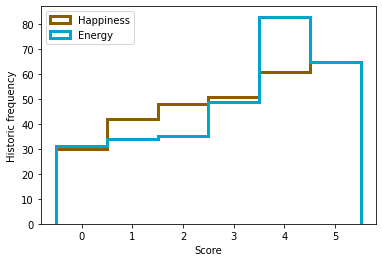

In [166]:
f, ax = plt.subplots()
ax.set_xlabel('Score')
ax.set_ylabel('Historic frequency')
ax.hist(
    [energy_distribution, happiness_distribution],
    bins=score_bins,
    histtype='step',
    label=['Energy', 'Happiness'],
    color=[(0,0.64548949,0.8), 'xkcd:poo brown'],
    
    linewidth=3
)
ax.legend(loc='upper left')

We also might want to set the line to not be a solid one.  We saw an example earlier of removing the lines between points of a plot, but matplotlib also has a few different [in-built line styles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html), some of which have shortcut symbols, and the ability to set your own style.

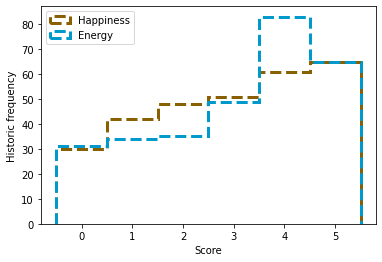

In [169]:
f, ax = plt.subplots()
ax.set_xlabel('Score')
ax.set_ylabel('Historic frequency')
ax.hist(
    [energy_distribution, happiness_distribution],
    bins=score_bins,
    histtype='step',
    label=['Energy', 'Happiness'],
    color=[(0,0.6,0.8), 'xkcd:poo brown'],
    linewidth=3,
    linestyle='--'
)
ax.legend(loc='upper left')

### 4.4: Region highlighting
Something I think ought to be used more in dataviz is highlighting baselines or areas of the plot that you want the audience to focus on.  matplotlib has options available to add in [horizontal](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axhline.html) or [vertical](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html) lines to the plot.

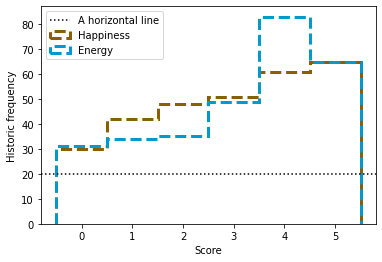

In [42]:
f, ax = plt.subplots()
ax.set_xlabel('Score')
ax.set_ylabel('Historic frequency')
ax.hist(
    [energy_distribution, happiness_distribution],
    bins=score_bins,
    histtype='step',
    label=['Energy', 'Happiness'],
    color=[(0,0.6,0.8), 'xkcd:poo brown'],
    linewidth=3,
    linestyle='--'
)

ax.axhline(y=20, linestyle=':', color='k', label='A horizontal line')

# Note: add the legend after the line if you want the line in the legend!
ax.legend(loc='upper left')

There are also options for adding [horizontal](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hlines.html) or [vertical](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.vlines.html) lines in your data rather than to the axes.

We can also add spans across the figure with the [Axes.axhspan()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axhspan.html) and [Axes.axvspan()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvspan.html) functions.  In the example below, even though we've plotted the vspan after the histograms, notice that matplotlib is clever and puts the span under the data!

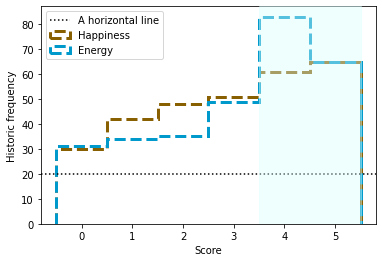

In [173]:
f, ax = plt.subplots()
ax.set_xlabel('Score')
ax.set_ylabel('Historic frequency')
ax.hist(
    [energy_distribution, happiness_distribution],
    bins=score_bins,
    histtype='step',
    label=['Energy', 'Happiness'],
    color=[(0,0.6,0.8), 'xkcd:poo brown'],
    linewidth=3,
    linestyle='--',
    zorder=2
)

ax.axhline(y=20, linestyle=':', color='k', label='A horizontal line')

ax.axvspan(3.5, 5.5, color='xkcd:ice blue', zorder=10, alpha=0.4)

ax.legend(loc='upper left')

### 4.5: Grid toggling
I wanted to point out that you can display a grid under the plot if you want to, with [Axes.grid()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html).

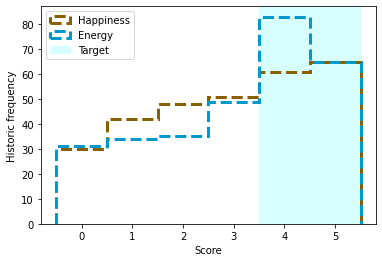

In [175]:
f, ax = plt.subplots()
ax.set_xlabel('Score')
ax.set_ylabel('Historic frequency')
ax.hist(
    [energy_distribution, happiness_distribution],
    bins=score_bins,
    histtype='step',
    label=['Energy', 'Happiness'],
    color=[(0,0.6,0.8), 'xkcd:poo brown'],
    linewidth=3,
    linestyle='--'
)
ax.axvspan(3.5, 5.5, color='xkcd:ice blue', label='Target')
ax.legend(loc='upper left')

ax.grid(False)

It's possible to have some finer control over which axis and the linestyle:

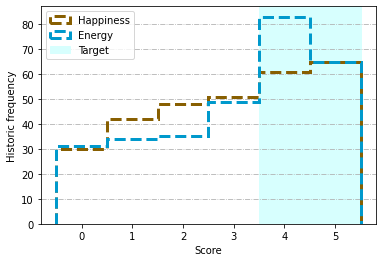

In [45]:
f, ax = plt.subplots()
ax.set_xlabel('Score')
ax.set_ylabel('Historic frequency')
ax.hist(
    [energy_distribution, happiness_distribution],
    bins=score_bins,
    histtype='step',
    label=['Energy', 'Happiness'],
    color=[(0,0.6,0.8), 'xkcd:poo brown'],
    linewidth=3,
    linestyle='--'
)
ax.axvspan(3.5, 5.5, color='xkcd:ice blue', label='Target')
ax.legend(loc='upper left')

ax.grid(axis='y', linestyle='-.')

And you can even format the major and minor ticks differently, which I personally like.

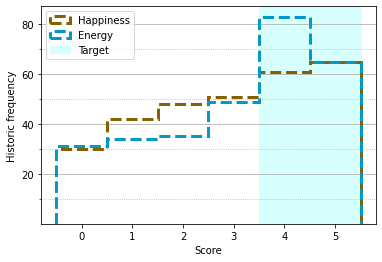

In [46]:
f, ax = plt.subplots()
ax.set_xlabel('Score')
ax.set_ylabel('Historic frequency')
ax.hist(
    [energy_distribution, happiness_distribution],
    bins=score_bins,
    histtype='step',
    label=['Energy', 'Happiness'],
    color=[(0,0.6,0.8), 'xkcd:poo brown'],
    linewidth=3,
    linestyle='--'
)
ax.axvspan(3.5, 5.5, color='xkcd:ice blue', label='Target')
ax.legend(loc='upper left')

# Set the ticks so we have some minor ticks to use
ax.set_yticks([20,40,60,80], minor=False)
ax.set_yticks([10,30,50,70], minor=True)

ax.grid(which='minor', axis='y', linestyle=':')
ax.grid(which='major', axis='y', linestyle='-')

# Note to self: Break time
(If we haven't already had a break)

### 4.6: Layering revisited
Let's go back to our scatter plot overlaid on the historical distribution image.  We can make sure that the scatter points aren't dominated by the image by setting the alpha (transparency) of that layer.  Alpha values of 0 are entirely transparent, and values of 1 are entirely opaque.

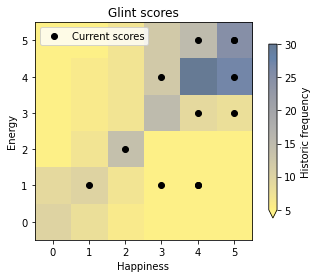

In [47]:
# Create the Figure and Axes as usual...
f, ax = plt.subplots()

# Set the axes and figure labels as before...
ax.set_ylabel('Energy')
ax.set_xlabel('Happiness')
ax.set_title('Glint scores')

# Draw the underlying image
im = ax.imshow(glint_image, origin='lower', cmap='cividis_r', vmin=5, alpha=0.6)

# Then plot the points
ax.plot(glint_results['happiness'], glint_results['energy'], 'ko', label='Current scores')

# Then add a colorbar and legend
plt.colorbar(
    im,
    label='Historic frequency',
    extend='min',
    shrink=0.8
)
ax.legend()

Pretty much any plotting layer can have the alpha set via a kwarg.

Previously, we had to ensure that we plotted the layers in the correct order.  We added the image to the Axes, and then the scatter points over the top.  Sometimes that's just not possible, but thankfully plot layers can be put into the correct order with the zorder kwarg.  Higher values of zorder are plotted on top of lower values.

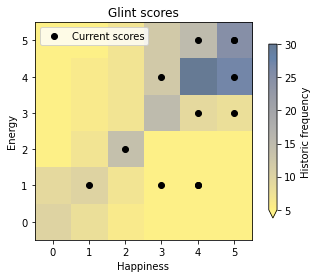

In [48]:
# Create the Figure and Axes as usual...
f, ax = plt.subplots()

# Set the axes and figure labels as before...
ax.set_ylabel('Energy')
ax.set_xlabel('Happiness')
ax.set_title('Glint scores')

# This time, we plot the points first
ax.plot(glint_results['happiness'], glint_results['energy'], 'ko', label='Current scores', zorder=5)

# And then the image
im = ax.imshow(glint_image, origin='lower', cmap='cividis_r', vmin=5, alpha=0.6, zorder=1)

# Then add a colorbar and legend
plt.colorbar(
    im,
    label='Historic frequency',
    extend='min',
    shrink=0.8
)
ax.legend()

Any object which appears in the Axes will have a zorder value.

### 4.7: Figures and subplots revisited
We learnt right at the start about how to generate figures and subplots, but we since haven't really used them.

One key alteration you might need to do is to change the figure size, which can be done with the figsize kwarg, which takes a (width, height) tuple in inches.

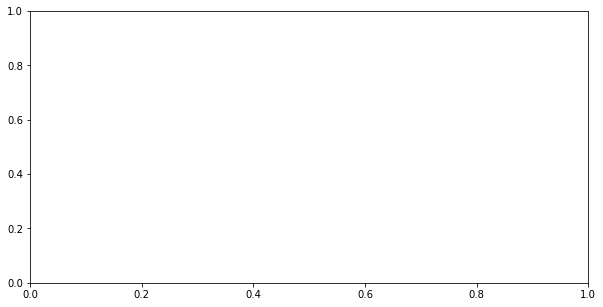

In [176]:
f, ax = plt.subplots(figsize=(10,5))

This is especially useful if we want two side-by-side plots, because it allows a  larger frame to fit both of them into.

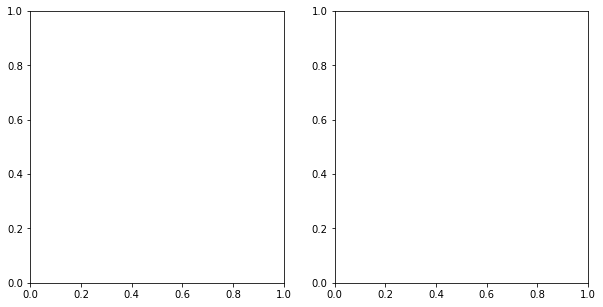

In [50]:
f, axs = plt.subplots(figsize=(10,5), ncols=2)

Often, we will want both of the side-by-side plots to have the same y-axis so we can compare them easily.  We can force that behaviour with the sharey (or sharex) kwarg, which can be True, False (default), 'none', 'all', 'row', or 'col'.  When the scale of one plot updates, the other will update too.  

(array([31., 34., 35., 49., 83., 65.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 [<matplotlib.patches.Polygon at 0x7fa9afb67d00>])

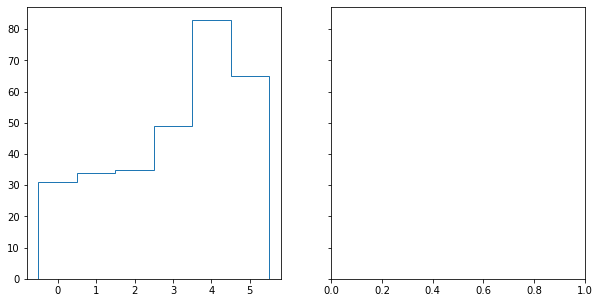

In [51]:
f, axs = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
axs[0].hist(energy_distribution, bins=score_bins, histtype='step')

Notice that the y-axis values only now appear once.  You can [add them back in again](https://stackoverflow.com/questions/51553545/matplotlib-tick-labels-disappeared-after-set-sharex-in-subplots), or my preferred behaviour is to remove the gap between the subplots.

These finer controls over how the subplots are arranged in the Figure require the use of the [matplotlib.gridspec](https://matplotlib.org/stable/api/gridspec_api.html) module which can be tricky to use at first.  Luckily, the pyplot.subplots() function uses gridspec under the cover, and we can pass some [useful parameters](https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html#matplotlib.gridspec.GridSpec) via the gridspec_kw kwarg as a dict.

(array([31., 34., 35., 49., 83., 65.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 [<matplotlib.patches.Polygon at 0x7fa99047c160>])

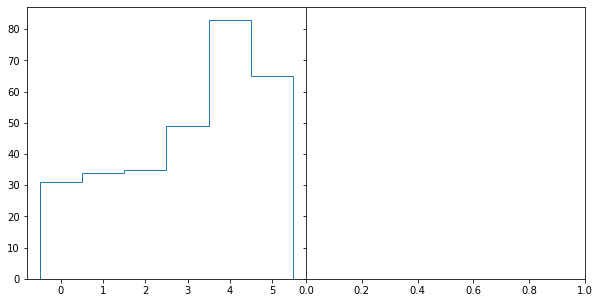

In [178]:
f, axs = plt.subplots(figsize=(10,5), ncols=2, sharey=True,
                      gridspec_kw={'wspace':0}
                     )
axs[0].hist(energy_distribution, bins=score_bins, histtype='step')

As well as being able to set the horizontal or vertical spacing between subplots with wspace and hspace respectively (which are measured in axes fractions), it's also useful to remember the width\_ratios and height\_ratios gridspec kwargs.

(array([31., 34., 35., 49., 83., 65.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 [<matplotlib.patches.Polygon at 0x7fa99028d070>])

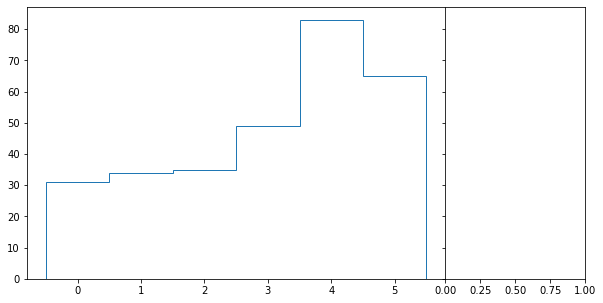

In [180]:
f, axs = plt.subplots(figsize=(10,5), ncols=2, sharey=True, gridspec_kw={'wspace':0, 'width_ratios':[3,1]})
axs[0].hist(energy_distribution, bins=score_bins, histtype='step')

### 4.8: Axis toggling
Sometimes, you might create several subplots but only need to use some of them.  You can remove the frames surrounding an Axes with the [Axes.axis()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axis.html) function (which also can be used to set some final controls about the scale between the x and y axes)

(0.0, 1.0, 0.0, 1.0)

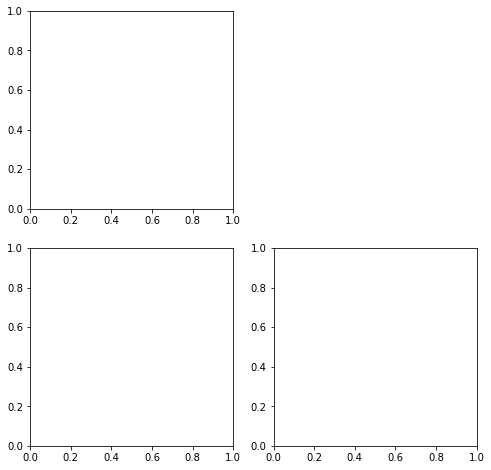

In [182]:
f, axs = plt.subplots(figsize=(8,8), nrows=2, ncols=2)
axs[0,1].axis(False)

### 4.9: Combining what we've learnt
We've covered enough now that we can make something that looks genuinely quite good!

(array([31., 34., 35., 49., 83., 65.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 [<matplotlib.patches.Polygon at 0x7fa98ff3d640>])

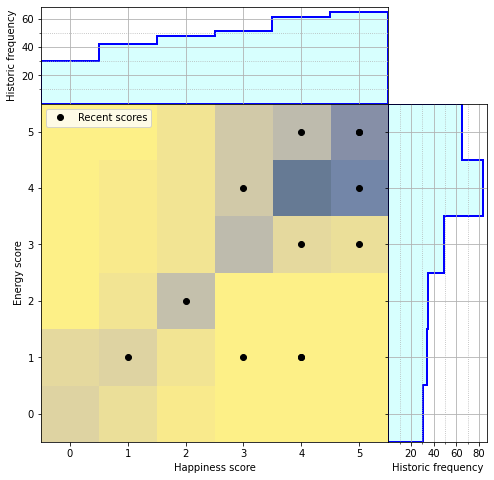

In [200]:
# ================
# SUBPLOTS SETUP

# Create a 2x2 grid of subplots
f, axs = plt.subplots(
    
    # Make the figure a nice size
    figsize=(8,8),
    
    # Set the number of rows and columns
    nrows=2, ncols=2,
    
    # Make sure that the x- and y-axes are consistent in a column and row respectively
    sharey='row', sharex='col',
    
    gridspec_kw = {
        
        # Make the bottom left subplot the largest
        'width_ratios':[3.5,1], 'height_ratios':[1,3.5],
        
        # Remove all spaces between subplots
        'hspace':0, 'wspace':0
    }
)

# Remove the top-right axes
axs[0,1].axis(False)


# ================
# AXES LABELS, SCALES, GRIDS

# Set axis labels
axs[1,0].set_xlabel('Happiness score')
axs[1,0].set_ylabel('Energy score')
axs[0,0].set_ylabel('Historic frequency')
axs[1,1].set_xlabel('Historic frequency')

# Set the rectangular ones to have consistent ticks
axs[0,0].set_yticks([10,30,50,70], minor=True)
axs[1,1].set_xticks([10,30,50,70], minor=True)
axs[0,0].set_yticks([20,40,60,80])
axs[1,1].set_xticks([20,40,60,80])

# Add some grid lines to every axes
[ax.grid(which='major', linestyle='-') for ax in [axs[0,0], axs[1,1]]]
[ax.grid(which='minor', linestyle=':') for ax in [axs[0,0], axs[1,1]]]


# ================
# MAIN PLOT

# Plot the historic image
axs[1,0].imshow(glint_image, origin='lower', cmap='cividis_r', vmin=5, alpha=0.6, zorder=1)

# Readjust the axis scaling to stop pixels having to be square, and keep the axes filling the space
axs[1,0].axis('auto')

# Add the scatter plot
axs[1,0].plot(glint_results['happiness'], glint_results['energy'], 'ko', zorder=50, label='Recent scores')

# Add a legend
axs[1,0].legend(loc='upper left')


# ================
# HISTOGRAMS

# Draw the histograms
axs[0,0].hist(
    happiness_distribution, bins=score_bins, histtype='stepfilled', linewidth=2,
    
    # We can set the edge and face colors to be different
    edgecolor='b', facecolor='xkcd:ice blue'
)

axs[1,1].hist(
    energy_distribution, bins=score_bins, histtype='stepfilled', linewidth=2,
    edgecolor='b', facecolor='xkcd:ice blue',
    
    # Rotate the histogram so it's plotted against the y-axis
    orientation='horizontal'
)

## Part 5: Geopandas and contextily
Most of what we'll want to be visualising is likely to involve a fair bit of geography...  Geopandas integrates absolutely beautifully with matplotlib.  I could eeeaaasily spend 2 hours just talking about making choropleths in matplotlib/geopandas but I'll just give enough of an introduction for you to go and explore.

### 5.1: Showing a GeoDataFrame
For an example, let's load in some geo data.  This one has the heights and names of the heighest points in each English ceremonial county.

In [56]:
county_tops = gpd.read_file('./County-tops.gpkg')
county_tops.head(5)

,NAME,DESCRIPTIO,HEIGHT,TOP,geometry
0,Bedfordshire,Ceremonial County,243,Dunstable Downs,"POLYGON ((527179.004 248224.996, 527162.003 24..."
1,Berkshire,Ceremonial County,297,Walbury Hill,"POLYGON ((504919.202 178392.095, 504918.798 17..."
2,Buckinghamshire,Ceremonial County,267,Haddington Hill,"POLYGON ((505704.800 185453.304, 505704.800 18..."
3,Cambridgeshire,Ceremonial County,146,Great Chishill,"POLYGON ((571833.397 261707.896, 571813.898 26..."
4,Cheshire,Ceremonial County,559,Shining Tor,"POLYGON ((401780.298 370227.103, 401778.600 37..."


Geopandas has a built-in [plot()](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html) method for GeoDataFrames, which is extremely powerful.  By default it will create a matplotlib Figure and Axes, and show the GeoDataFrame's contents (whether points, lines, or polygons).

<AxesSubplot:>

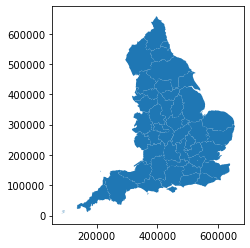

In [57]:
county_tops.plot()

### 5.2: Integrating matplotlib and geopandas
If you want to make the most of the fine control available with matplotlib, we can create an Axes and tell geopandas to plot into that Axes instead of creating a new one via the ax kwarg.

(53976.329555000004, 684656.266145, -27279.692545, 690212.7984450001)

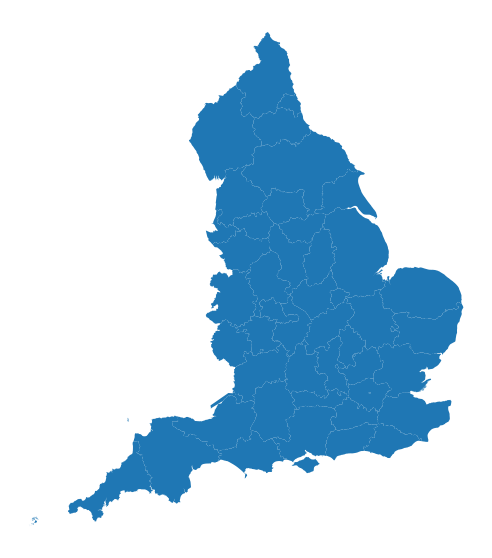

In [58]:
# Create a large canvas
f, ax = plt.subplots(figsize=(10,10))

# Plot the geodataframe into the axes we created
county_tops.plot(ax=ax)

# We don't really need the axes showing the coordinates
ax.axis('off')

There's also plenty of control available over how the geo data appears, using matplotlib kwargs and syntax.  For example, we might only want to show the county outlines as black borders

<AxesSubplot:>

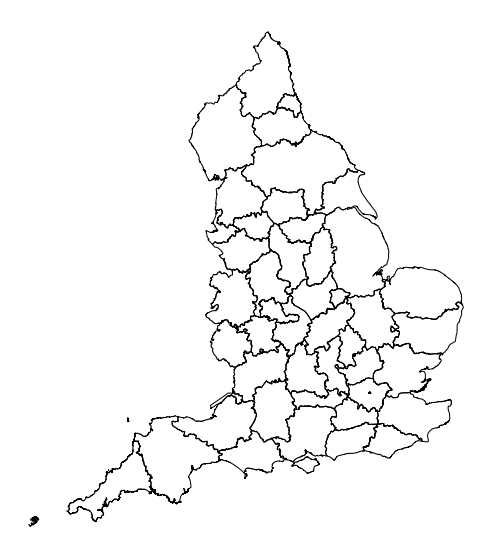

In [59]:
f, ax = plt.subplots(figsize=(10,10))
ax.axis('off')

# Plot the data with no fill colour, only outlines in black
county_tops.plot(ax=ax, edgecolor='k', facecolor='none')

### 5.3: Turning a geodataframe into a choropleth
The geodataframe.plot() method has a column kwarg which applies a colour to each object according to a value present in a column.  For example, let's colour the counties by their highest altitude.

<AxesSubplot:>

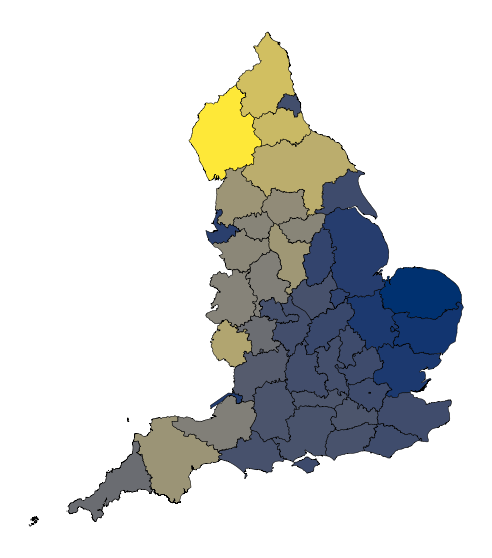

In [201]:
f, ax = plt.subplots(figsize=(10,10))
ax.axis('off')

county_tops.plot(
    ax=ax,
    
    # Add a thin black line for county outlines
    edgecolor='k',
    linewidth=0.5,
    
    # Colour the polygon faces by the value in the "HEIGHT" column using the "terrain" colormap
    column='HEIGHT',
    cmap='cividis'
)

We'll also need a legend.  The geodataframe.plot() has a legend kwarg to toggle whether a legend is present.

<AxesSubplot:>

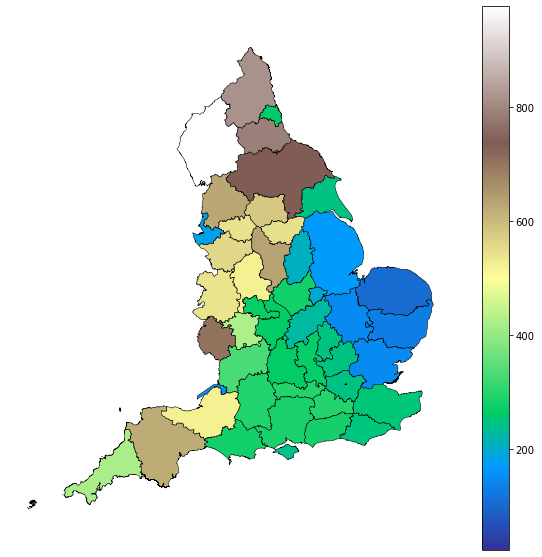

In [202]:
f, ax = plt.subplots(figsize=(10,10))
ax.axis('off')

county_tops.plot(
    ax=ax,
    
    # Add a thin black line for county outlines
    edgecolor='k',
    linewidth=0.5,
    
    # Colour the polygon faces by the value in the "HEIGHT" column using the "terrain" colormap
    column='HEIGHT',
    cmap='terrain',
    
    # Add a legend
    legend=True
)

Notice how geopandas has detected that we're using a continuous colour scale, so the "legend" is actually a colorbar.  Let's just look how it behaves when we give discrete values:

<AxesSubplot:>

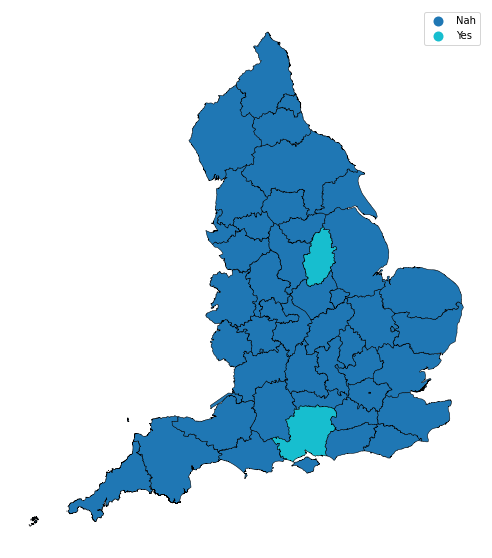

In [62]:
# Add a new column
county_tops['has_tom_lived_here'] = county_tops['NAME'].apply(
    lambda county: "Yes" if county=='Nottinghamshire' or county=='Hampshire' else "Nah"
)

# Create the subplots like before
f, ax = plt.subplots(figsize=(10,10))
ax.axis('off')

county_tops.plot(
    ax=ax,
    edgecolor='k',
    linewidth=0.5,
    
    # Colour the polygon faces by the new column of string values
    column='has_tom_lived_here',
    
    # Add a legend
    legend=True
)

When we have string values in the column to plot, the colorbar becomes a legend.  You can force numerical values to be treated as categorical data in the geodataframe.plot() by setting categorical=True.

Anyway, back to the previous example.  That colorbar looks silly as it is.  We can pass the kwargs we might want to use with the usual [pyplot.colorbar()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) via the legend_kwds kwarg.

<AxesSubplot:>

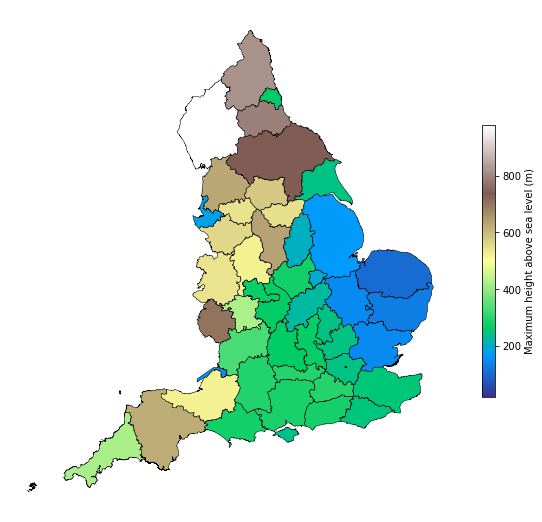

In [63]:
f, ax = plt.subplots(figsize=(10,10))
ax.axis('off')

county_tops.plot(
    ax=ax,
    edgecolor='k',
    linewidth=0.5,
    column='HEIGHT',
    cmap='terrain',
    legend=True,
    
    legend_kwds = {
        
        # Set the label
        'label':'Maximum height above sea level (m)',
        
        # Make it smaller
        'shrink':0.5
    }
)

One final step might be to manually set the minimum and maximum data values of the color scale, via the vmin and vmax kwargs as we used with imshow.

Text(0.5, 1.0, 'English county tops')

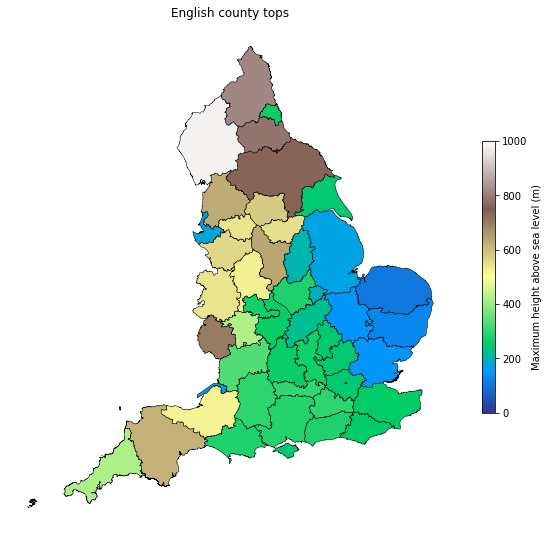

In [64]:
f, ax = plt.subplots(figsize=(10,10))
ax.axis('off')

county_tops.plot(
    ax=ax,
    edgecolor='k',
    linewidth=0.5,
    column='HEIGHT',
    cmap='terrain',
    legend=True,
    legend_kwds = {
        'label':'Maximum height above sea level (m)',
        'shrink':0.5
    },
    
    # Set the bluest colour to be sea level and the whitest as 1000m
    vmin=0, vmax=1000
)

# Also let's add a figure title
ax.set_title('English county tops')

### 5.4: Classifying data in a choropleth
It's common practice to categorise your data into discrete bins.  I'm not always a massive fan of doing so, but the ONS like it at least.  You can add discretisation via the scheme kwarg, which calls the (poorly-documented) [mapclassify](https://pypi.org/project/mapclassify/) Python package.  There are [many different types](https://pysal.org/mapclassify/api.html) of classification.

Text(0.5, 1.0, 'English county tops')

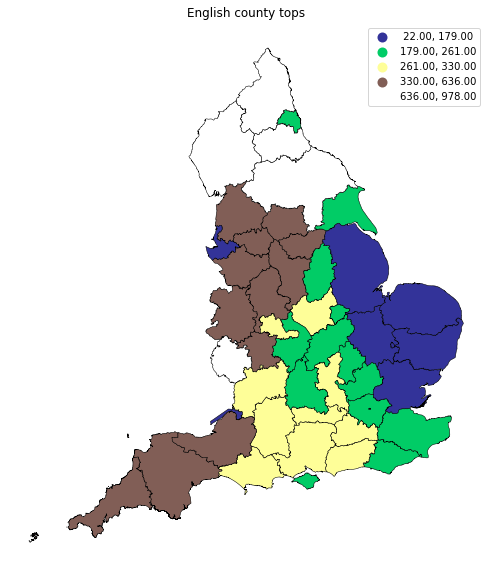

In [65]:
f, ax = plt.subplots(figsize=(10,10))
ax.axis('off')

county_tops.plot(
    ax=ax,
    edgecolor='k',
    linewidth=0.5,
    column='HEIGHT',
    cmap='terrain',
    legend=True,
    
    # Split the data into discrete bins via the Jenks-Caspall method
    scheme='JenksCaspall'
)

# Also let's add a figure title
ax.set_title('English county tops')

You can change the number of bins via the k kwarg

Text(0.5, 1.0, 'English county tops')

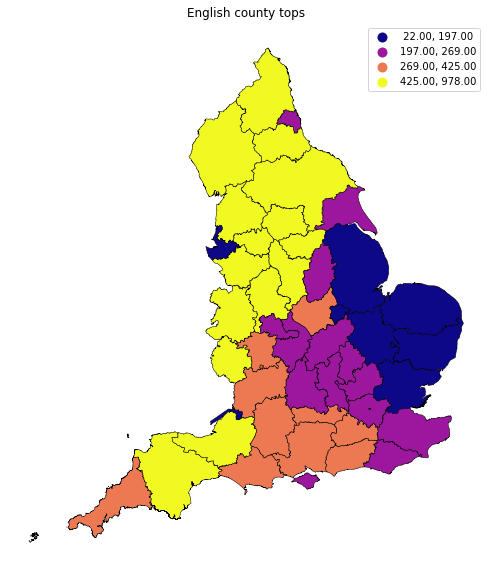

In [66]:
f, ax = plt.subplots(figsize=(10,10))
ax.axis('off')

county_tops.plot(
    ax=ax,
    edgecolor='k',
    linewidth=0.5,
    column='HEIGHT',
    cmap='plasma',
    legend=True,
    
    # Split the data into 4 discrete bins via the Jenks-Caspall method
    scheme='JenksCaspall', k=4
)

# Also let's add a figure title
ax.set_title('English county tops')

I don't like how those legend labels appear.  We can change them via the legend_kwds kwarg.

Text(0.5, 1.0, 'English county tops')

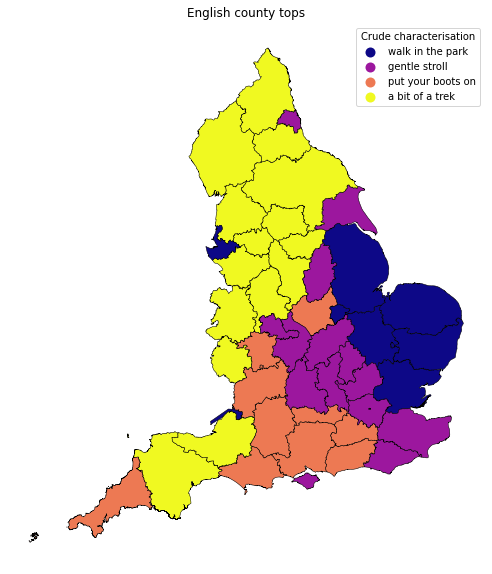

In [67]:
f, ax = plt.subplots(figsize=(10,10))
ax.axis('off')

county_tops.plot(
    ax=ax,
    edgecolor='k',
    linewidth=0.5,
    column='HEIGHT',
    cmap='plasma',
    legend=True,
    scheme='JenksCaspall', k=4,
    legend_kwds = {
        'labels':['walk in the park', 'gentle stroll', 'put your boots on', 'a bit of a trek'],
        'title':'Crude characterisation'
    }
)

# Also let's add a figure title
ax.set_title('English county tops')

### 5.5: Add a backdrop map
It is possible to add a backdrop map to a matplotlib Axes, using the [contextily](https://contextily.readthedocs.io/) Python package, which is not nearly as good as it looks unfortunately.  For a start, it only works in EPSG 4326, so we need to convert the geodataframe.

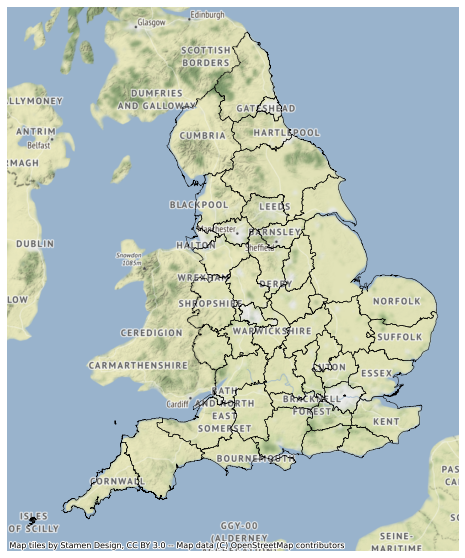

In [68]:
# Reproject with geopandas
county_tops_reprojected = county_tops.to_crs('epsg:3857')

f, ax = plt.subplots(figsize=(10,10))
ax.axis('off')
county_tops_reprojected.plot(
    ax=ax,
    edgecolor='k',
    facecolor='none',
    linewidth=0.5
)

# Add the basemap with contextily
ctx.add_basemap(ax=ax)

We have a slightly better backdrop map to use, which we can specify with the source kwarg...

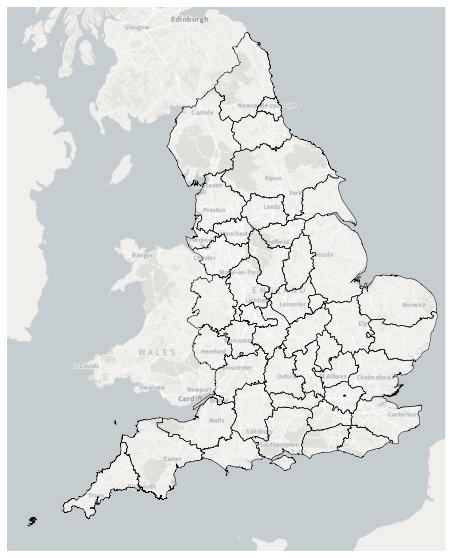

In [69]:
# This is my OS Maps API URL, from the data hub
api_url = 'https://api.os.uk/maps/raster/v1/zxy/Light_3857/{z}/{x}/{y}.png?key=4q4pbod6fY9gGRCsoMsixP0zNcJSZntL'

f, ax = plt.subplots(figsize=(10,10))
ax.axis('off')
county_tops_reprojected.plot(
    ax=ax,
    edgecolor='k',
    facecolor='none',
    linewidth=0.5
)

ctx.add_basemap(
    ax=ax,
    source=api_url
)

Let's just combine that backdrop map with the choropleth we made earlier

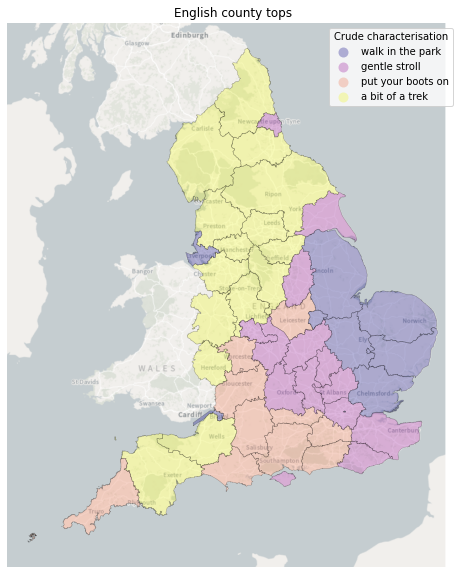

In [124]:
f, ax = plt.subplots(figsize=(10,10))
ax.axis('off')
ax.set_title('English county tops')

county_tops_reprojected.plot(
    ax=ax,
    edgecolor='k',
    linewidth=0.5,
    column='HEIGHT',
    cmap='plasma',
    legend=True,
    scheme='JenksCaspall', k=4,
    alpha=0.3,
    legend_kwds = {
        'labels':['walk in the park', 'gentle stroll', 'put your boots on', 'a bit of a trek'],
        'title':'Crude characterisation'
    }
)

ctx.add_basemap(
    ax=ax,
    source=api_url
)

## And beyond...
Hopefully I've given you enough of a grounding in the basics of matplotlib that you can go away and start to piece together different elements to make your own amazing visualisations.  Other than interactivity, there's not really many limits to what's possible, and I'm learning all the time.

(Side note: it is possible to add interactivity to matplotlib.  It just doesn't work well, especially not within Jupyter.  It's also possible to create animations!)

If you think it would be worthwhile, I could run a more detailed workshop at some point on some of the finer controls about creating other plots in matplotlib/geopandas.  We could cover some of the more technical aspects of how matplotlib creates graphics, in terms of patches, layers, and handling large or very irregular multi-plots with gridspec, and connecting Figures and Axes objects (e.g. drawing arrows between them).

Otherwise, go and explore!  I'd love to see what you manage to create.

Text(0, 0.5, 'Matplotlib ability... -->')

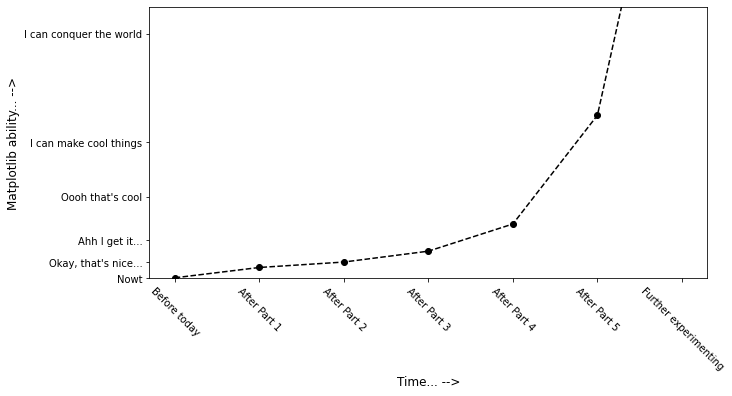

In [71]:
f, ax = plt.subplots(figsize=(10,5))

time_labels = ['Before today', 'After Part 1', 'After Part 2', 'After Part 3', 'After Part 4', 'After Part 5', 'Further experimenting']

ax.plot(
    range(len(time_labels)),
    [0.1, 2, 3, 5, 10, 30, 100],
    'ko--'
)

ax.set_ylim(0,50)

ax.set_xticks(range(len(time_labels)))
ax.set_xticklabels(time_labels, rotation=-45)

ax.set_yticks([0,3,7,15,25,45])
ax.set_yticklabels(
    ['Nowt', "Okay, that's nice...", "Ahh I get it...", "Oooh that's cool", "I can make cool things", "I can conquer the world"]
)

ax.set_xlabel('Time... -->', fontdict={'fontsize':'large'})
ax.set_ylabel('Matplotlib ability... -->', fontdict={'fontsize':'large'})